# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



## Exploratory Data Analysis 

In [5]:
df = pd.read_csv("data/Advertising.csv", index_col= 0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [ ]:
df["newpaper"] = df["newpaper"].str.replace("s", "")
df["newpaper"] = df["newpaper"].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    float64
 3   sales     200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [12]:
df.describe()

,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


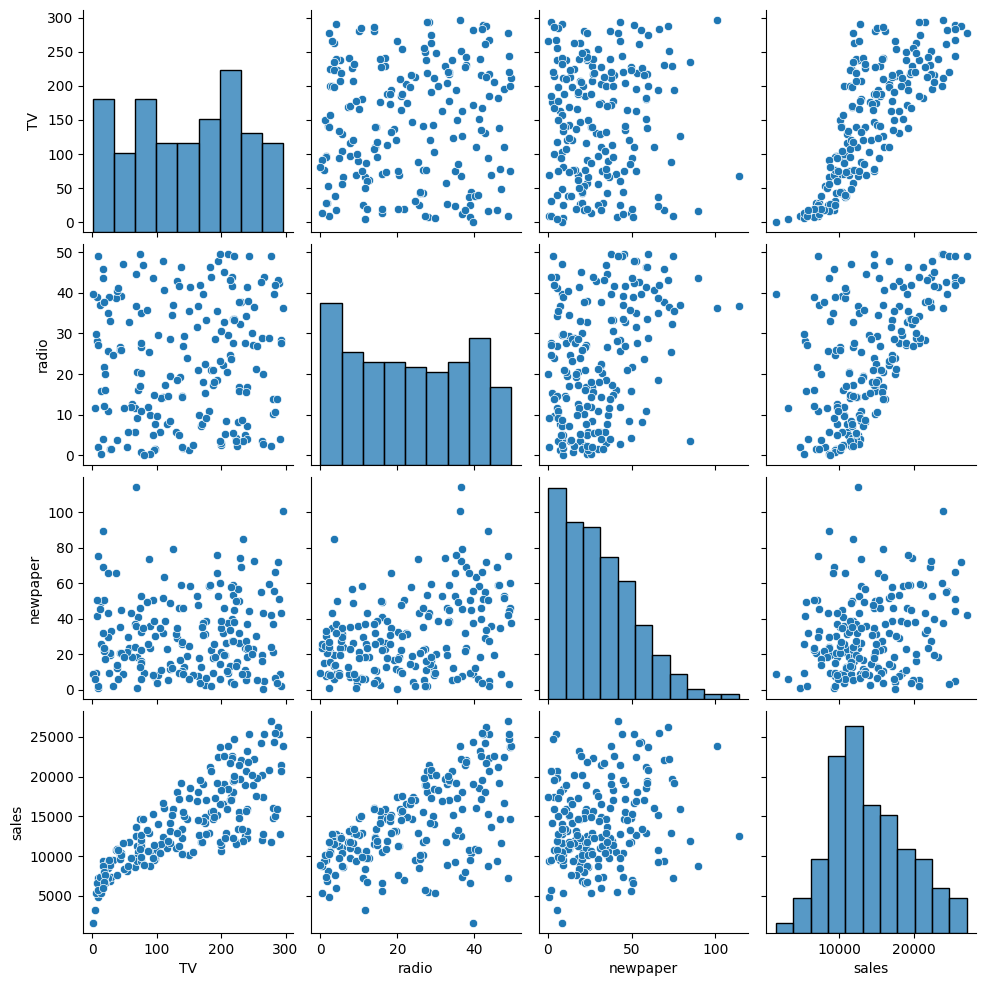

In [13]:
sns.pairplot(df)

<Axes: >

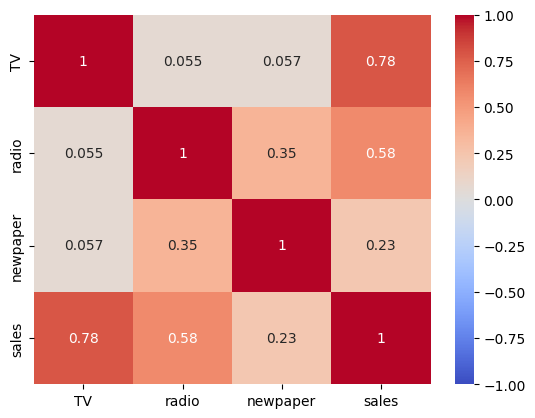

In [14]:
sns.heatmap(df.corr(), annot= True, cmap = "coolwarm", vmin=-1)

## Modelado

In [15]:
X = df.drop(columns = ["sales"])
y = df["sales"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))

MAE:  1885.0130310423156
MSE:  6700486.756528875


In [23]:
pred_final = lm.predict([[200, 200, 200]])
print(pred_final)


[50249.45638911]


c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## NORMALIZACIÓN

In [ ]:
# NO ES MUY UTIL.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaler = st_scaler.transform(X_train)
X_test_scaler = st_scaler.transform(X_test)

In [27]:
lm.fit(X_train_scaler, y_train)

pred_scaler = lm.predict(X_test_scaler)

print("MAE: ", mean_absolute_error(y_test, pred_scaler))
print("MSE: ", mean_squared_error(y_test, pred_scaler))

MAE:  1885.013031042316
MSE:  6700486.7565288795


In [30]:
from sklearn.preprocessing import PolynomialFeatures

plm = PolynomialFeatures(degree=4)
plm.fit(X_train)
X_train_pl = plm.transform(X_train)
X_test_pl = plm.transform(X_test)


lm_2 = LinearRegression()
lm_2.fit(X_train_pl, y_train)

pred_Xtrain = lm_2.predict(X_train_pl)
pred_lm_p = lm_2.predict(X_test_pl)

print("TRAIN: ")
print("MAE: ", mean_absolute_error(y_train, pred_Xtrain))
print("MSE: ", mean_squared_error(y_train, pred_Xtrain))

print("TEST: ")
print("MAE: ", mean_absolute_error(y_test, pred_lm_p))
print("MSE: ", mean_squared_error(y_test, pred_lm_p))

TRAIN: 
MAE:  229.55898270006963
MSE:  90037.55643235687
TEST: 
MAE:  418.9545359206638
MSE:  611359.1231374765


In [59]:
from sklearn.linear_model import Ridge, Lasso


pl_r = PolynomialFeatures(degree=4)
pl_r.fit(X_train_scaler, y_train)
pl_r_train = pl_r.transform(X_train_scaler)
pl_r_test = pl_r.transform(X_test_scaler)


ridge = Ridge(alpha=0.0001)
ridge.fit(pl_r_train, y_train)

pred_ridge = ridge.predict(pl_r_test)

print("TEST: ")
print("MAE: ", mean_absolute_error(y_test, pred_ridge))
print("MSE: ", mean_squared_error(y_test, pred_ridge))

TEST: 
MAE:  418.95252981938876
MSE:  611349.0262191576


In [37]:
baseline_error = 6700486

In [49]:
n_alphas = 100
alphas = np.logspace(-4, 3,n_alphas)

coef = []
mse_ridge = []
mse_lr = []

lm = LinearRegression()
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)

baseline_error = mean_squared_error(y_test, pred_lm)


for i in alphas:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train_scaler, y_train)
    pred = ridge.predict(X_test_scaler)

    ridge_mse = mean_squared_error(y_test, pred)
    mse_ridge.append(ridge_mse)
    mse_lr.append(baseline_error)





In [50]:
print(mse_ridge) 
print(mse_lr)

[6700489.353509428, 6700489.812688751, 6700490.353057296, 6700490.988970589, 6700491.737322519, 6700492.617994192, 6700493.654382154, 6700494.874020063, 6700496.30931031, 6700497.998385025, 6700499.986119412, 6700502.325324334, 6700505.078149892, 6700508.317737324, 6700512.130163272, 6700516.6167281205, 6700521.896649392, 6700528.110232053, 6700535.422600251, 6700544.028090064, 6700554.155420721, 6700566.073782481, 6700580.100004223, 6700596.606992896, 6700616.033671496, 6700638.896682895, 6700665.804175118, 6700697.472040808, 6700734.743051149, 6700778.609404973, 6700830.239309269, 6700891.008320881, 6700962.536314947, 6701046.73110761, 6701145.839954844, 6701262.510382555, 6701399.862084578, 6701561.571965234, 6701751.974816332, 6701976.18262206, 6702240.226102074, 6702551.222862152, 6702917.57746119, 6703349.219871605, 6703857.89027199, 6704457.479949921, 6705164.440420429, 6705998.275827222, 6706982.13748377, 6708143.544284794, 6709515.259015158, 6711136.358750361, 6713053.54817177

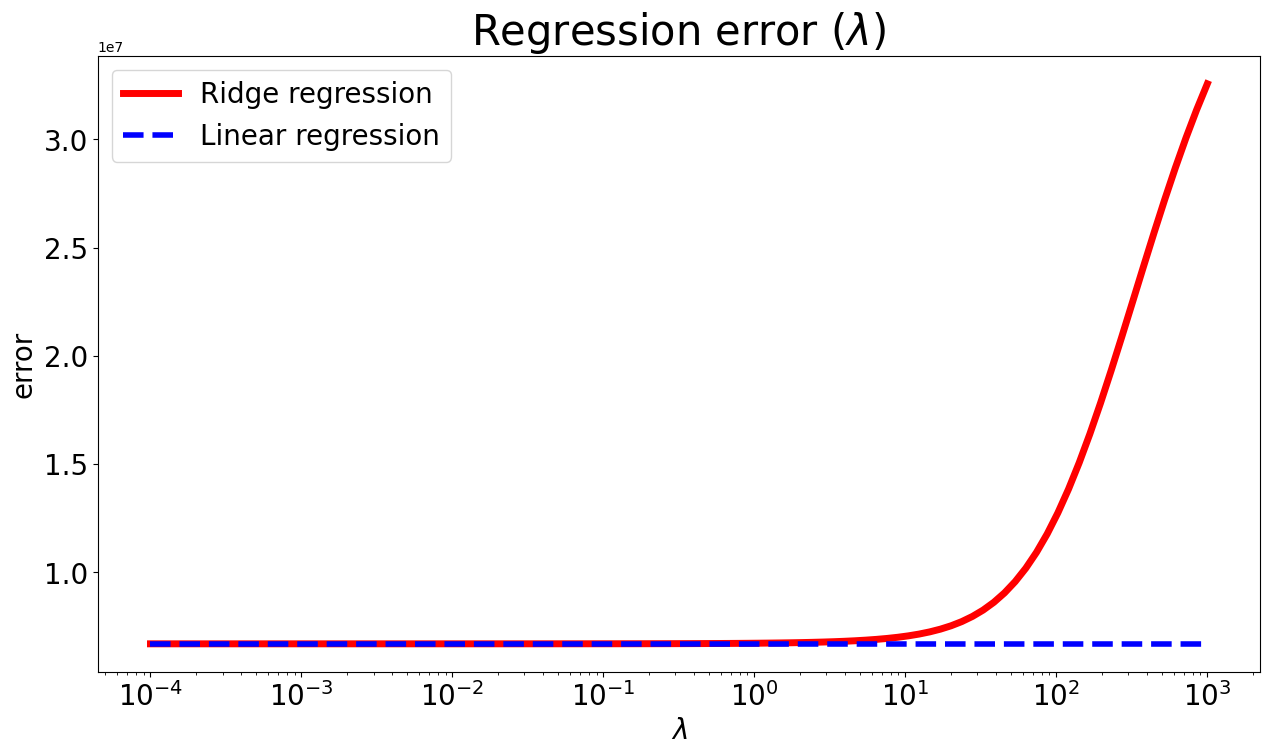

In [51]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, mse_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, mse_lr, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('error', fontsize=20)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

pl_r = PolynomialFeatures(degree=4)
pl_r.fit(X_train_scaler, y_train)
pl_r_train = pl_r.transform(X_train_scaler)
pl_r_test = pl_r.transform(X_test_scaler)

ridge = Ridge()

parametros = {"alpha":np.logspace(-4, 3,n_alphas)}

gs = GridSearchCV(ridge, parametros, scoring="neg_mean_absolute_error", cv = 5)
gs.fit(pl_r_train, y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.17681195e-04, 1.38488637e-04, 1.62975083e-04,
       1.91791026e-04, 2.25701972e-04, 2.65608778e-04, 3.12571585e-04,
       3.67837977e-04, 4.32876128e-04, 5.09413801e-04, 5.99484250e-04,
       7.05480231e-04, 8.30217568e-04, 9.77009957e-04, 1.14975700e-03,
       1.35304777e-03, 1.59228279e-03, 1.87381742e-03, 2....
       2.36448941e+01, 2.78255940e+01, 3.27454916e+01, 3.85352859e+01,
       4.53487851e+01, 5.33669923e+01, 6.28029144e+01, 7.39072203e+01,
       8.69749003e+01, 1.02353102e+02, 1.20450354e+02, 1.41747416e+02,
       1.66810054e+02, 1.96304065e+02, 2.31012970e+02, 2.71858824e+02,
       3.19926714e+02, 3.76493581e+02, 4.43062146e+02, 5.21400829e+02,
       6.13590727e+02, 7.22080902e+02, 8.49753436e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')

In [52]:
modelo_final = gs.best_estimator_

In [56]:
gs.best_params_

{'alpha': np.float64(0.0001)}

In [60]:
gs.best_score_

np.float64(-364.8285874817693)